<a href="https://colab.research.google.com/github/RafaFdezF/rnn_lstm_gru_data_azucar/blob/main/recurrent_neural_networks_lstm_gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Funciones Auxiliares

In [ ]:
def plot_predictions(test,predicted,field):
    plt.plot(test, color='red',label='Real Data')
    plt.plot(predicted, color='blue',label='Predicted Data')
    plt.title(field+'Prediction')
    plt.xlabel('Time')
    plt.ylabel('Data Value')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2e}".format(rmse))

def return_mae(test, predicted):
    mae = mean_absolute_error(test, predicted)
    print("The mean absolute error is {:.2e}".format(mae))

def return_rrmse(test, predicted):
    rmse  = math.sqrt(mean_squared_error(test, predicted))
    std_test = np.std(test)
    rrmse = (rmse / std_test) * 100
    print("The Relative Root Mean Square Error {:.2f}".format(rrmse))


def return_m_scaled_error (test, predicted):
    absolute_errors = np.abs(test - predicted)
    mean_scaled_error = np.mean(absolute_errors) / np.mean(test)
    print("The Mean Scaled Absolute Error {:.2f}".format(mean_scaled_error))

#Obtencion de datos###

In [ ]:
dataset = pd.read_csv('despues de limpieza.csv', index_col='Fecha', parse_dates=['Fecha'])
dataset.head()

,Dia,Mes,Año,101:108,109:119,"135:139,154",146:149,161:163,164:166,"183,083",...,493:499,500,565:568,"600:612,696",600,630:634,645,646:654,690,698
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,2021,-2183.51,10998679.02,1029833.40,43505.44,200.0,18281.97,15634.45,...,0.0,49976.45,0.0,1591932.09,1591932.09,3474217.74,79596.6,0.0,0.0,0.0
2021-01-02,2,1,2021,-2183.51,10998679.02,1029833.40,43505.44,200.0,18281.97,15634.45,...,0.0,49976.45,0.0,1591932.09,1591932.09,3474217.74,79596.6,0.0,0.0,0.0
2021-01-03,3,1,2021,-2183.51,10998679.02,1029833.40,43505.44,200.0,18281.97,15634.45,...,0.0,49976.45,0.0,1591932.09,1591932.09,3474217.74,79596.6,0.0,0.0,0.0
2021-01-04,4,1,2021,-2183.51,10996129.02,1029833.40,45905.44,200.0,18281.97,15634.45,...,0.0,49976.45,0.0,1591932.09,1591932.09,3474217.74,79596.6,0.0,0.0,0.0
2021-01-05,5,1,2021,-2183.51,10996344.06,1029618.36,45905.44,200.0,18281.97,15634.45,...,0.0,49976.45,0.0,1591932.09,1591932.09,3474217.74,79596.6,0.0,0.0,0.0


#Separación en conjunto de entrenamiento y prueba
(entenamiento hasta sep-2022, validacion desde oct-2022 en adelante)

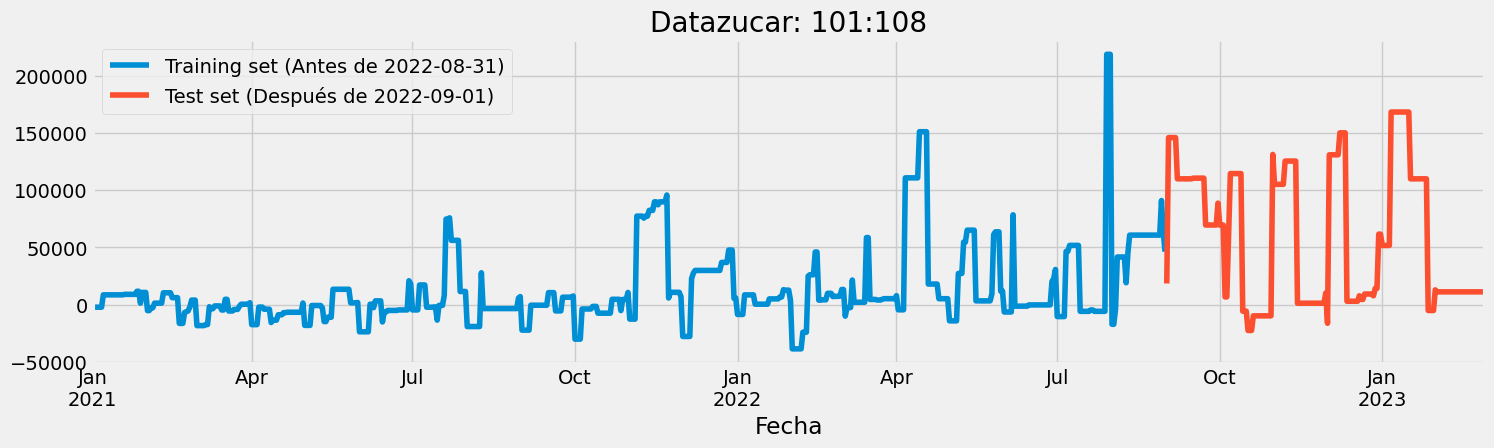

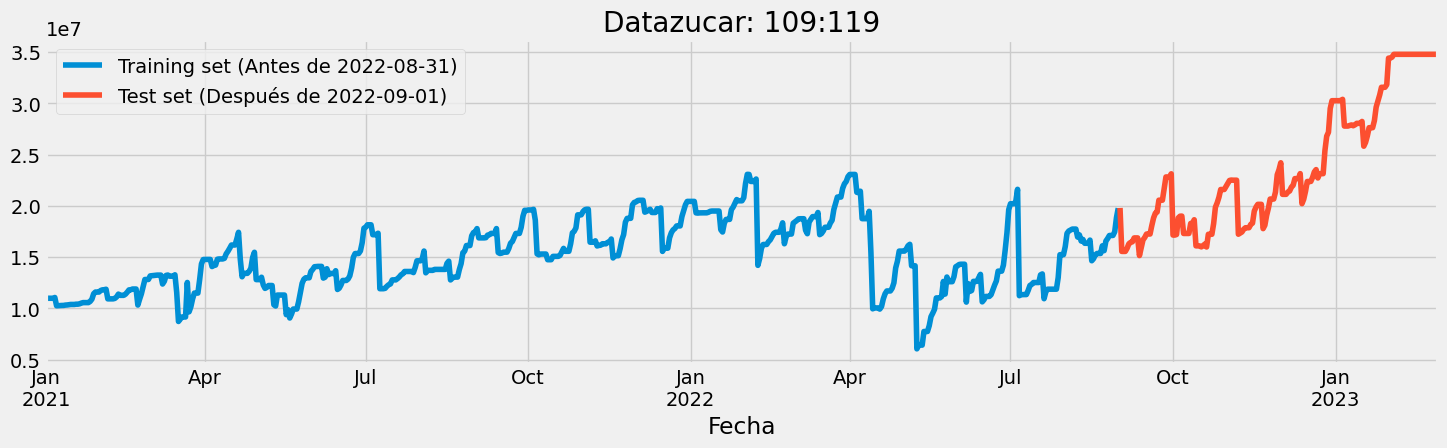

In [ ]:
# Para un solo dato (109-119)
training_set_od = dataset[:'2022-08-31'].iloc[:,4:5].values
test_set_od = dataset['2022-09-01':].iloc[:,4:5].values


# Para todos los datos
training_set = dataset[:'2022-08-31'].iloc[:,3:].values
test_set = dataset['2022-09-01':].iloc[:,3:].values
dataset["101:108"][:'2022-08-31'].plot(figsize=(16,4),legend=True)
dataset["101:108"]['2022-09-01':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Antes de 2022-08-31)','Test set (Después de 2022-09-01)'])
plt.title('Datazucar: 101:108')
plt.show()
print()
dataset["109:119"][:'2022-08-31'].plot(figsize=(16,4),legend=True)
dataset["109:119"]['2022-09-01':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Antes de 2022-08-31)','Test set (Después de 2022-09-01)'])
plt.title('Datazucar: 109:119')
plt.show()



In [ ]:
# Scaling the training set
# sc = MinMaxScaler(feature_range=(0,1))
# sc_od = MinMaxScaler(feature_range=(0,1))
# training_set_scaled = sc.fit_transform(training_set)
# training_set_scaled_od = sc_od.fit_transform(training_set_od)

sc = StandardScaler ()
sc_od = StandardScaler ()
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled_od = sc_od.fit_transform(training_set_od)

# # Normalize the training set
# training_set_scaled, sc_scale = normalize(training_set, norm='l2', axis=0, return_norm=True)
# training_set_scaled_od, sc_scale_od = normalize(training_set_od, norm='l2', axis=0, return_norm=True)


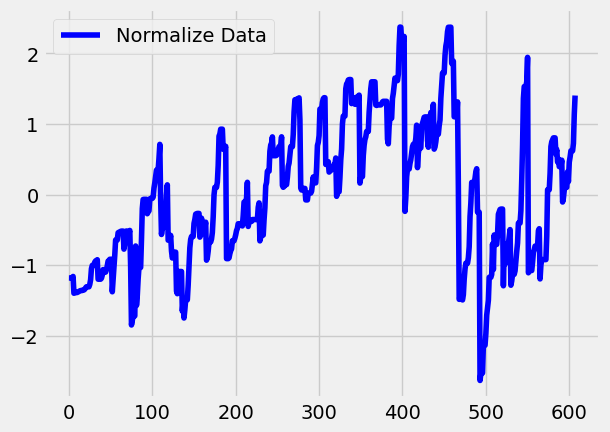

(608, 1)
(608, 43)


In [ ]:
plt.plot(training_set_scaled_od, color='blue',label='Normalize Data')
plt.legend()
plt.show()
print(training_set_scaled_od.shape)
print(training_set_scaled.shape)

In [ ]:
# Para un solo dato
X_train_od = []
y_train_od = []
for i in range(60,608):
    X_train_od.append(training_set_scaled_od[i-60:i,0])
    y_train_od.append(training_set_scaled_od[i,0])
X_train_od, y_train_od = np.array(X_train_od), np.array(y_train_od)

# Para todos los datos
X_train = []
y_train = []
for i in range(60,608):
    X_train.append(training_set_scaled[i-60:i,:])
    y_train.append(training_set_scaled[i,:])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Para un dato
X_train_od = np.reshape(X_train_od, (X_train_od.shape[0],X_train_od.shape[1],1))

# Para todos los datos
X_train = np.reshape(X_train, X_train.shape)


#PARA TODOS LOS DATOS


## LONG SHORT-TERM MEMORY


In [ ]:
model_lstm = Sequential()
# Primera capa LSTM

model_lstm.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
model_lstm.add(Dropout(0.1))

# Segunda capa LSTM
model_lstm.add(LSTM(units=300, return_sequences=True))
model_lstm.add(Dropout(0.2))


# Tercera capa LSTM
model_lstm.add(LSTM(units=200, return_sequences=True))
model_lstm.add(Dropout(0.2))

# Cuarta capa LSTM
model_lstm.add(LSTM(units=100, return_sequences=True))
model_lstm.add(Dropout(0.2))


# Quinta capa LSTM
model_lstm.add(LSTM(units=100))
model_lstm.add(Dropout(0.2))

# Salida

model_lstm.add(Dense(units=X_train.shape[2]))


# Compiling the RNN
model_lstm.compile(optimizer='adam',loss='mean_squared_error')

# Fitting to the training set
model_lstm.fit(X_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
18/18 [==============================] - 11s 29ms/step - loss: 0.6310
Epoch 2/100
18/18 [==============================] - 0s 18ms/step - loss: 0.4546
Epoch 3/100
18/18 [==============================] - 0s 17ms/step - loss: 0.4021
Epoch 4/100
18/18 [==============================] - 0s 18ms/step - loss: 0.3748
Epoch 5/100
18/18 [==============================] - 0s 18ms/step - loss: 0.3409
Epoch 6/100
18/18 [==============================] - 0s 17ms/step - loss: 0.3223
Epoch 7/100
18/18 [==============================] - 0s 18ms/step - loss: 0.3141
Epoch 8/100
18/18 [==============================] - 0s 17ms/step - loss: 0.3396
Epoch 9/100
18/18 [==============================] - 0s 17ms/step - loss: 0.3064
Epoch 10/100
18/18 [==============================] - 0s 18ms/step - loss: 0.2883
Epoch 11/100
18/18 [==============================] - 0s 18ms/step - loss: 0.2743
Epoch 12/100
18/18 [==============================] - 0s 18ms/step - loss: 0.2667
Epoch 13/100
18/18 [====

###Prueba de LSTM###

In [ ]:
dataset_total = pd.concat((pd.DataFrame(training_set[:]),pd.DataFrame(test_set[:])), axis=0)
#print(dataset_total)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:]
inputs  = sc.transform(inputs)

In [ ]:
print(test_set.shape)

(181, 43)


In [ ]:
X_test = []
for i in range(60,241):
    X_test.append(inputs[i-60:i,:])
X_test = np.array(X_test)
X_test = np.reshape(X_test, X_test.shape)
predicted_value_lstm = model_lstm.predict(X_test)
predicted_value_lstm = sc.inverse_transform(predicted_value_lstm)


6/6 [==============================] - 2s 13ms/step


###Visualizacion de la prueba###

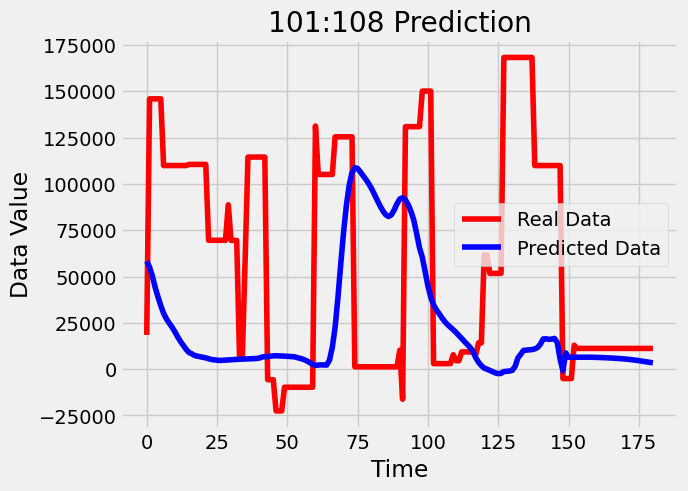

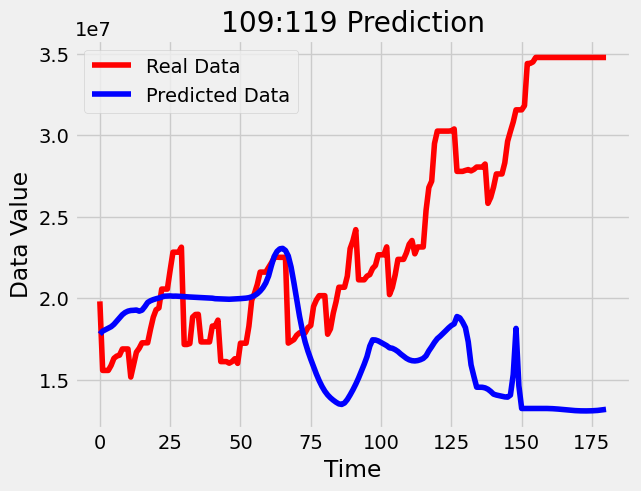

In [ ]:
plot_predictions(test_set[:,0],predicted_value_lstm[:,0],"101:108 ")
print()
plot_predictions(test_set[:,1],predicted_value_lstm[:,1],"109:119 ")


In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_value_lstm)
return_mae(test_set,predicted_value_lstm)
return_rrmse(test_set,predicted_value_lstm)
return_m_scaled_error(test_set,predicted_value_lstm)

The root mean squared error is 3.68e+06
The mean absolute error is 1.22e+06
The Relative Root Mean Square Error 70.46
The Mean Scaled Absolute Error 0.64



## GATED RECURRENT UNITS


In [ ]:
model_GRU = Sequential()
# Primera capa GRU

model_GRU.add(GRU(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model_GRU.add(Dropout(0.2))

# Segunda capa GRU

model_GRU.add(GRU(units=200, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model_GRU.add(Dropout(0.2))

# Tercera capa GRU

model_GRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model_GRU.add(Dropout(0.2))

# Cuarta capa GRU

model_GRU.add(GRU(units=100, activation='tanh'))
model_GRU.add(Dropout(0.2))


# Capa de salida
model_GRU.add(Dense(units=X_train.shape[2]))

# Compiling the RNN
model_GRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
model_GRU.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
18/18 [==============================] - 6s 21ms/step - loss: 0.8670
Epoch 2/100
18/18 [==============================] - 0s 14ms/step - loss: 0.6393
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 0.5375
Epoch 4/100
18/18 [==============================] - 0s 13ms/step - loss: 0.4813
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 0.4533
Epoch 6/100
18/18 [==============================] - 0s 13ms/step - loss: 0.4334
Epoch 7/100
18/18 [==============================] - 0s 16ms/step - loss: 0.4163
Epoch 8/100
18/18 [==============================] - 0s 18ms/step - loss: 0.4007
Epoch 9/100
18/18 [==============================] - 0s 17ms/step - loss: 0.3888
Epoch 10/100
18/18 [==============================] - 0s 16ms/step - loss: 0.3773
Epoch 11/100
18/18 [==============================] - 0s 17ms/step - loss: 0.3648
Epoch 12/100
18/18 [==============================] - 0s 18ms/step - loss: 0.3578
Epoch 13/100
18/18 [=====

###Prueba de GRU###

In [ ]:
X_test = []
for i in range(60,241):
    X_test.append(inputs[i-60:i,:])
X_test = np.array(X_test)
X_test = np.reshape(X_test, X_test.shape)
GRU_predicted_value = model_GRU.predict(X_test)
GRU_predicted_value = sc.inverse_transform(GRU_predicted_value)

6/6 [==============================] - 1s 10ms/step


###Visualizacion de la prueba###

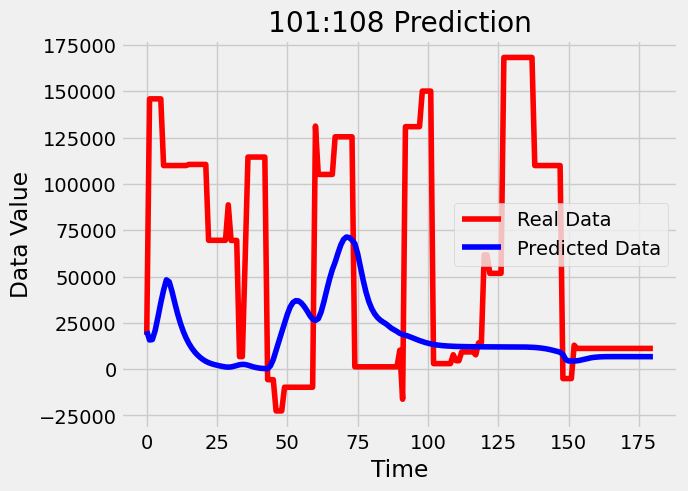

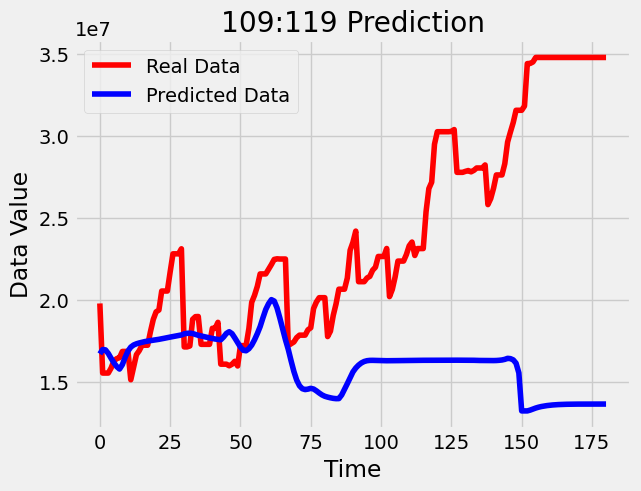

In [ ]:

plot_predictions(test_set[:,0],GRU_predicted_value[:,0],"101:108 ")
print()
plot_predictions(test_set[:,1],GRU_predicted_value[:,1],"109:119 ")


In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_value)
return_mae(test_set,GRU_predicted_value)
return_rrmse(test_set,GRU_predicted_value)
return_m_scaled_error(test_set,GRU_predicted_value)

The root mean squared error is 3.23e+06
The mean absolute error is 1.06e+06
The Relative Root Mean Square Error 61.82
The Mean Scaled Absolute Error 0.56


#PARA UN SOLO DATO (109:119)


## LONG SHORT-TERM MEMORY


In [ ]:
model_lstm_od = Sequential()

# Primera capa LSTM
model_lstm_od.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_od.shape[1],1)))
model_lstm_od.add(Dropout(0.2))

# Segunda capa LSTM
model_lstm_od.add(LSTM(units=100, return_sequences=True))
model_lstm_od.add(Dropout(0.2))

# Tercera capa LSTM
model_lstm_od.add(LSTM(units=50, return_sequences=True))
model_lstm_od.add(Dropout(0.2))

# Cuarta capa LSTM
model_lstm_od.add(LSTM(units=50))
model_lstm_od.add(Dropout(0.2))

# Capa de Salida
model_lstm_od.add(Dense(units=1))



# Compiling the RNN
model_lstm_od.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
model_lstm_od.fit(X_train_od,y_train_od,epochs=50,batch_size=32)

Epoch 1/50
18/18 [==============================] - 6s 18ms/step - loss: 0.6229
Epoch 2/50
18/18 [==============================] - 0s 14ms/step - loss: 0.5619
Epoch 3/50
18/18 [==============================] - 0s 14ms/step - loss: 0.4725
Epoch 4/50
18/18 [==============================] - 0s 13ms/step - loss: 0.3618
Epoch 5/50
18/18 [==============================] - 0s 14ms/step - loss: 0.3400
Epoch 6/50
18/18 [==============================] - 0s 13ms/step - loss: 0.3235
Epoch 7/50
18/18 [==============================] - 0s 14ms/step - loss: 0.2946
Epoch 8/50
18/18 [==============================] - 0s 13ms/step - loss: 0.2822
Epoch 9/50
18/18 [==============================] - 0s 14ms/step - loss: 0.2644
Epoch 10/50
18/18 [==============================] - 0s 13ms/step - loss: 0.2559
Epoch 11/50
18/18 [==============================] - 0s 13ms/step - loss: 0.2398
Epoch 12/50
18/18 [==============================] - 0s 14ms/step - loss: 0.2339
Epoch 13/50
18/18 [==================

###Prueba de LSTM###

In [ ]:
dataset_total = pd.concat((dataset["109:119"][:'2022-08-31'],dataset["109:119"]['2022-09-01':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set_od) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc_od.transform(inputs)


In [ ]:
# Preparando X_test y prediciendo los valores

X_test_od = []
for i in range(60,241):
    X_test_od.append(inputs[i-60:i,0])
X_test_od = np.array(X_test_od)
X_test_od = np.reshape(X_test_od, (X_test_od.shape[0],X_test_od.shape[1],1))
predicted_value = model_lstm_od.predict(X_test_od)
predicted_value = sc_od.inverse_transform(predicted_value)



6/6 [==============================] - 1s 10ms/step


###Visualizacion de la prueba###

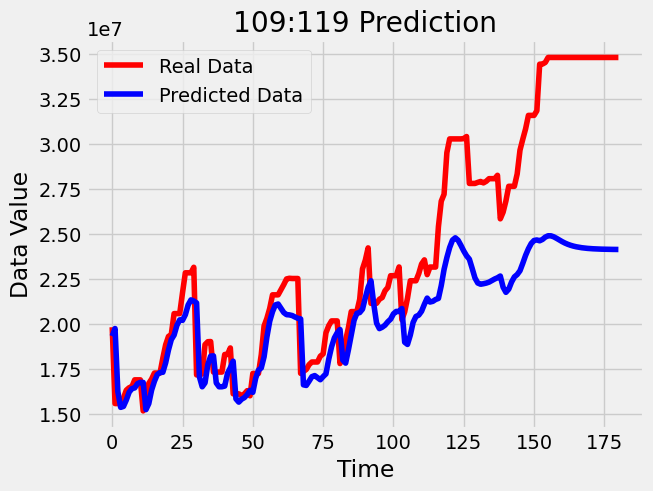

In [ ]:

plot_predictions(test_set_od[:,0],predicted_value[:,0],"109:119 ")


In [ ]:
return_rmse(test_set_od,predicted_value)
return_mae(test_set_od,predicted_value)
return_rrmse(test_set_od,predicted_value)
return_m_scaled_error(test_set_od,predicted_value)

The root mean squared error is 5.02e+06
The mean absolute error is 3.57e+06
The Relative Root Mean Square Error 79.15
The Mean Scaled Absolute Error 0.15



## GATED RECURRENT UNITS


In [ ]:
model_GRU_od = Sequential()
# Primera capa GRU

model_GRU_od.add(GRU(units=100, return_sequences=True, input_shape=(X_train_od.shape[1],1), activation='tanh'))
model_GRU_od.add(Dropout(0.3))

# Second GRU layer
model_GRU_od.add(GRU(units=80, return_sequences=True, input_shape=(X_train_od.shape[1],1), activation='tanh'))
model_GRU_od.add(Dropout(0.2))

# Third GRU layer
model_GRU_od.add(GRU(units=50, return_sequences=True, input_shape=(X_train_od.shape[1],1), activation='tanh'))
model_GRU_od.add(Dropout(0.1))

# Fourth GRU layer
model_GRU_od.add(GRU(units=30, activation='tanh'))
model_GRU_od.add(Dropout(0.2))

# The output layer
model_GRU_od.add(Dense(units=1))

# Compiling the RNN
model_GRU_od.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')

# Fitting to the training set
model_GRU_od.fit(X_train_od,y_train_od,epochs=50,batch_size=150)

Epoch 1/50
4/4 [==============================] - 6s 25ms/step - loss: 0.9442
Epoch 2/50
4/4 [==============================] - 0s 23ms/step - loss: 0.5666
Epoch 3/50
4/4 [==============================] - 0s 19ms/step - loss: 0.3958
Epoch 4/50
4/4 [==============================] - 0s 20ms/step - loss: 0.4207
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.3588
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.3553
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.3226
Epoch 8/50
4/4 [==============================] - 0s 14ms/step - loss: 0.3080
Epoch 9/50
4/4 [==============================] - 0s 14ms/step - loss: 0.3002
Epoch 10/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2893
Epoch 11/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2704
Epoch 12/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2610
Epoch 13/50
4/4 [==============================] - 0s 15ms/st

###Prueba de GRU###

In [ ]:
X_test_od = []
for i in range(60,241):
    X_test_od.append(inputs[i-60:i,0])
X_test_od = np.array(X_test_od)
X_test_od = np.reshape(X_test_od, (X_test_od.shape[0],X_test_od.shape[1],1))
GRU_predicted_value_od = model_GRU_od.predict(X_test_od)
GRU_predicted_value_od = sc_od.inverse_transform(GRU_predicted_value_od)


6/6 [==============================] - 1s 8ms/step


###Visualizacion de la prueba###

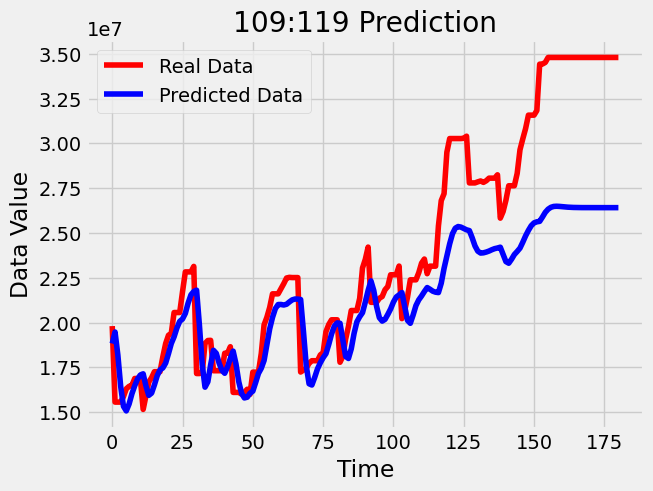

In [ ]:
plot_predictions(test_set_od[:,0],GRU_predicted_value_od[:,0],"109:119 ")

In [ ]:
# Evaluating GRU
return_rmse(test_set_od,GRU_predicted_value_od)
return_mae(test_set_od,GRU_predicted_value_od)
return_rrmse(test_set_od,GRU_predicted_value_od)
return_m_scaled_error(test_set_od,GRU_predicted_value_od)

The root mean squared error is 4.11e+06
The mean absolute error is 3.01e+06
The Relative Root Mean Square Error 64.80
The Mean Scaled Absolute Error 0.13
